# Q.1. Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
### Draw the inferences from the clusters obtained.

### Data Description:

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000

2 = 5,000 - 10,000

3 = 10,001 - 25,000

4 = 25,001 - 50,000

5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

# import and read the data 

In [2]:
import numpy as np
import pandas as pd

In [3]:
data_airline=pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
data_airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# EDA

In [4]:
data_airline.shape

(3999, 12)

In [5]:
data_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
data_airline.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

### NO null value present in data

In [7]:
data_airline.duplicated().sum()

0

In [8]:
data_airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Data Preparation

In [9]:
data_airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
# "ID#" column is not required so remove it
data_airline.drop('ID#', axis=1, inplace=True)
data_airline.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


## Normalize the data

In [11]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar=scalar.fit_transform(data_airline)

In [12]:
scaled_data = pd.DataFrame(scalar,columns=data_airline.columns)
scaled_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


# Hierarchical Clustering

In [13]:
#import clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn import metrics

## here we are using single linkage method, but  you can use complete linkage or avg linakge or centroid linkage method any of them.

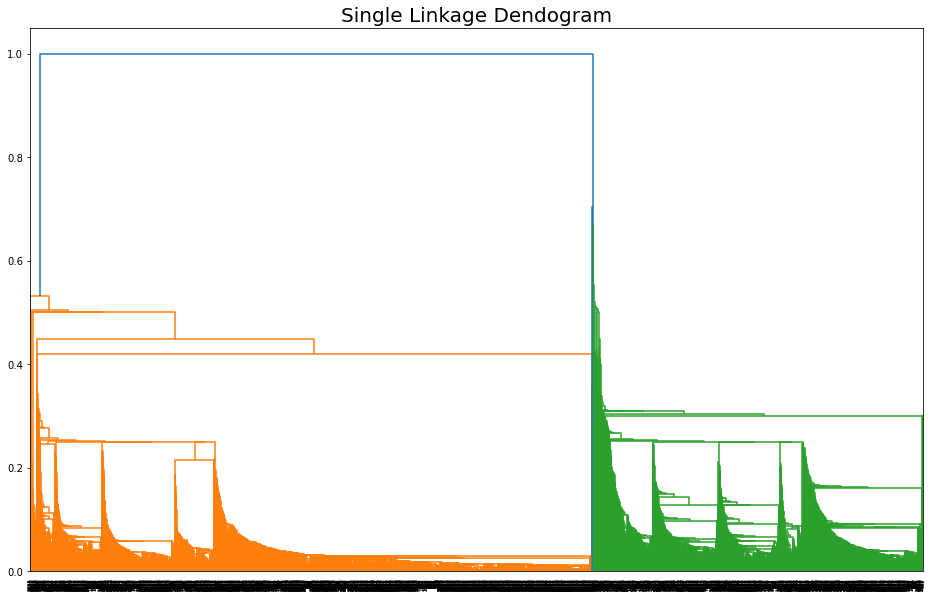

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'single')) #single linkage method
plt.title('Single Linkage Dendogram', size = 20);

##### Build agglomerative cluster (bottom-up) approach

In [15]:
# 5 cluster
hc_single = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')

In [16]:
#fit the cluster
y_hc_single = hc_single.fit_predict(scaled_data)

In [37]:
#assign labels to cluster
data_airline['Cluster_Id_single'] = y_hc_single
data_airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_Id,ClusterId,Cluster_Id_single
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3,1


In [38]:
data_airline['Cluster_Id_single'].value_counts()


0    2518
1    1478
4       1
3       1
2       1
Name: Cluster_Id_single, dtype: int64

In [19]:
#evaluation of model
from sklearn import metrics
metrics.silhouette_score(scaled_data, y_hc_single, metric='euclidean' )

0.48005487141025094

## Complete Linkage Method

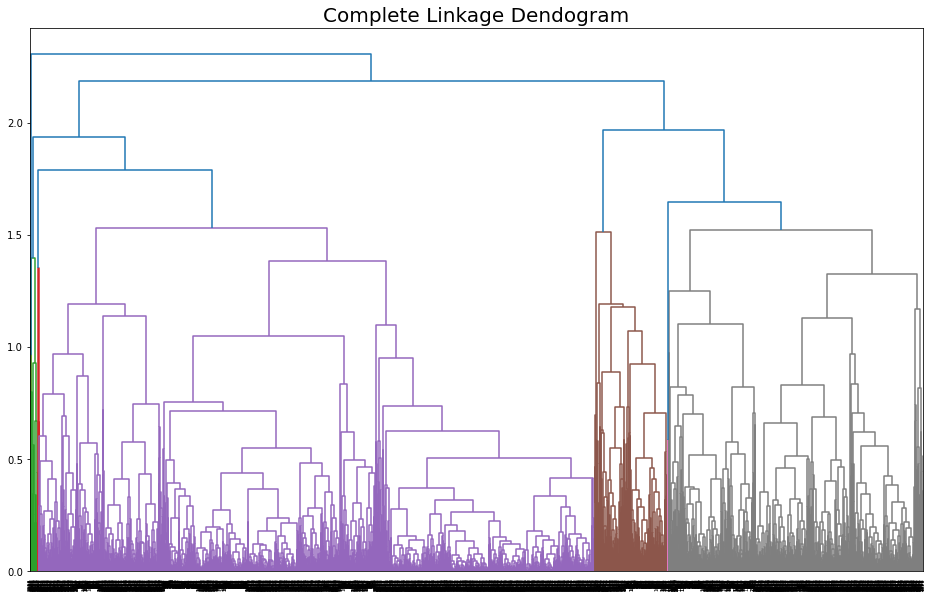

In [20]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'complete'))
plt.title('Complete Linkage Dendogram', size = 20);

In [25]:
hc_complete = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')

In [26]:
y_hc_complete = hc_complete.fit_predict(scaled_data)

In [39]:
data_airline['Cluster_Id_complete'] = y_hc_complete
data_airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_Id,ClusterId,Cluster_Id_single,Cluster_Id_complete
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3,1,1


In [40]:
data_airline['Cluster_Id_complete'].value_counts()

0    2495
2    1144
1     325
4      31
3       4
Name: Cluster_Id_complete, dtype: int64

In [41]:
#accuracy
#evaluation of model
from sklearn import metrics
metrics.silhouette_score(scaled_data, y_hc_complete, metric='euclidean' )

0.4167248248554337

## Ward Linkage Method

Text(0.5, 1.0, 'Centroid Linkage Dendogram')

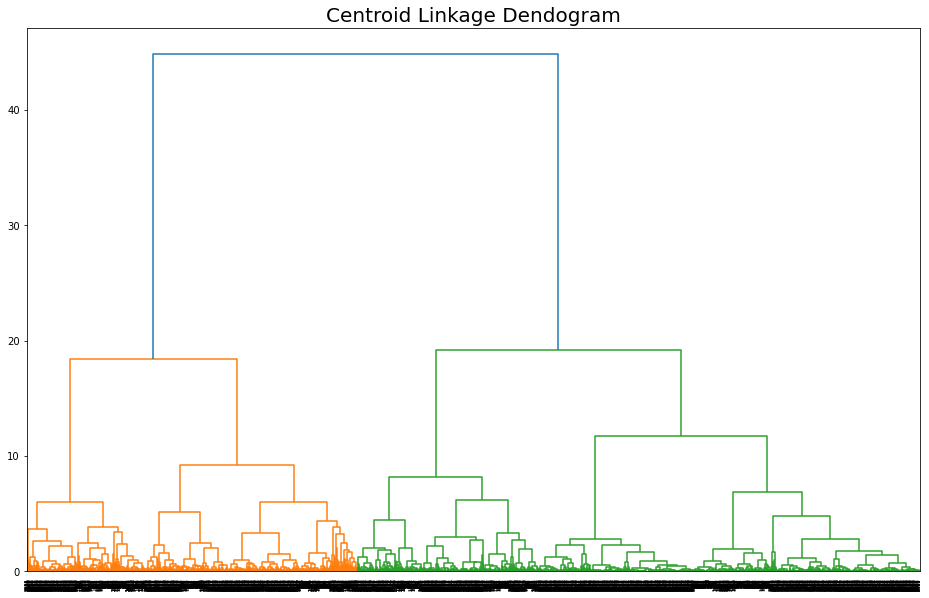

In [30]:
fig = plt.figure(figsize = (16,10))
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = 'ward'))
plt.title('Centroid Linkage Dendogram', size = 20)

In [33]:
hc_ward = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc_ward = hc_ward.fit_predict(scaled_data)

In [42]:
data_airline['ClusterId_ward'] = y_hc_ward
data_airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_Id,ClusterId,Cluster_Id_single,Cluster_Id_complete,ClusterId_ward
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3,1,1,3


In [43]:
data_airline['ClusterId_ward'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: ClusterId_ward, dtype: int64

In [44]:
#accuracy
#evaluation of model
from sklearn import metrics
metrics.silhouette_score(scaled_data, y_hc_ward, metric='euclidean' )

0.3762586351398372

## by applying 'single' , 'complete' and 'ward' linkage method, we observe that we get best silhouette score with single linkage.

# DBScan

In [57]:
dbscan = DBSCAN(eps = 0.9, min_samples = 5)
dbscan.fit(scaled_data)

DBSCAN(eps=0.9)

In [59]:
db_pred=dbscan.fit_predict(scaled_data)

In [61]:
data_airline['Cluster'] = db_pred
data_airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_Id,ClusterId,Cluster_Id_single,Cluster_Id_complete,ClusterId_ward,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3,1,1,3,1


In [62]:
#accuracy
silhouette_DBSCAN = (metrics.silhouette_score(scaled_data,db_pred))
silhouette_DBSCAN

0.535930510919477

## From all the clustering methods DBSCAN Clustering also provides the better result.